## Due date: Friday, 2 April 2021, 11:59 PM

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
%config Completer.use_jedi = False

In [2]:
def saveto(filename):
    plt.savefig('LaTeX Report/figures/'+ filename)

def saveimg(filename, image):
    cv.imwrite('LaTeX Report/figures/'+ filename,image)

# Part 1

A part of the code for a linear classifier for CIFAR10 given in listing 1. For our linear classifier, the score function is f (x) = Wx + b, and the loss function is the mean sum of squared errors function. [3 marks]
1. Implement gradient descent and run for 300 epochs.
2. Show the weights matrix W as 10 images.
3. Report the (initial) learning rate, training and testing loss and accuracies.

(Hint: If your loss explodes, reduce the leaning rate.)
* [np.unique](https://numpy.org/doc/stable/reference/generated/numpy.unique.html), [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), [tf.keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical), [np.random.randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)

In [26]:
# Loading the Data Set
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape); print('y_train: ', y_train.shape)
#print(y_train[0:10])

# y_train contains labels form 0 to 9 corresponding to 10 classes.
K = len(np.unique(y_train)) # Number of Classes

Ntr = x_train.shape[0]; print('Number of training samples:', Ntr) # Number of training samples 50,000
Nte = x_test.shape[0]; print('Number of test samples: ',Nte)      # Number of test samples 10,000
Din = 3072 # CIFAR10 # 32x32x3 = height x width x channel

print("Pre-processing loaded data...\n")
# Normalize pixel values: Image data preprocessing
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0) # axis=0: mean of a column; Mean of each pixel
x_train = x_train - mean_image
x_test = x_test - mean_image

# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K); print('y_train: ', y_train.shape); #print(y_train[0:10,:])
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K); #print(y_test[0:10,:])

x_train = np.reshape(x_train,(Ntr,Din)).astype('float32');# print(x_train[0:10, 0:20])
x_test = np.reshape(x_test,(Nte,Din)).astype('float32')
print('Reshaped x_train: ', x_train.shape)
print('Reshaped x_test: ', x_test.shape)

std=1e-5 # For random samples from N(\mu, \sigma^2), use: sigma * np.random.randn(...) + mu
w1 = std*np.random.randn(Din, K) # Initializing the weight matrix with random weights
b1 = np.zeros(K) # Initializing the bias vector
print("w1:", w1.shape);print("b1:", b1.shape)

"""
Keep track of two sets of parameters w1 and b1 seperately is not really efficient.
This can be eiliminated by combining both of them into one single matrix as follows.
Aditionally the bias term '1' must be added infront of each image row, for this to wrok.
i.e to enable matrix multiplication.
"""
# Rearranging train and test samples
x_train = np.concatenate((np.ones((x_train.shape[0],1)),x_train), axis=1); print('Rearranged x_train with a column of 1s: ', x_train.shape)
x_test  = np.concatenate((np.ones((x_test.shape[0],1)),x_test), axis=1)
# Rearranging weight matrix and bias matrix into single matrix
w1 = np.concatenate((b1.reshape(1,K), w1), axis=0); print('Rearranged w1 with the bias vector: ',w1.shape)
print("Pre-processing completed. Ready to train Parameters...")

x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)
Number of training samples: 50000
Number of test samples:  10000
Pre-processing loaded data...

y_train:  (50000, 10)
Reshaped x_train:  (50000, 3072)
Reshaped x_test:  (10000, 3072)
w1: (3072, 10)
b1: (10,)
Rearranged x_train with a column of 1s:  (50000, 3073)
Rearranged w1 with the bias vector:  (3073, 10)
Pre-processing completed. Ready to train Parameters...


In [ ]:
iterations = 300  # Gradient descent interations
lr = 0.00005 # Learninig rate
lr_decay= 0.999
reg = 5e-6
loss_history = [] # Vlaues of cost function at each iteration 
train_acc_history = []
val_acc_history = []

m = x_train.shape[0]  # Number of training examples

# Running gradient descent number of times speciied in iterations
print("Running gradient descent...")
for t in range(iterations):
    """
        class vectors are now a binary class matrix of 0s and 1s.
    To get the error, hypothesis matrix's elements must be 
    normalized to be within [-1,1].
    Then prediction = label is minimum for maximum predicted value.  
    """ 
    hypothesis = x_train.dot(w1)
    
    loss = (1/(2*m))*np.sum(( hypothesis - y_train)**2) + reg*np.sum(w1**2)
    loss_history.append(loss)
    
    dw1 = (1/m)*(x_train.T.dot(hypothesis - y_train)) + reg*w1
    w1 = w1 - lr*dw1
print("Gradient Descent completed. Parameters were trained")   

Running gradient descent...


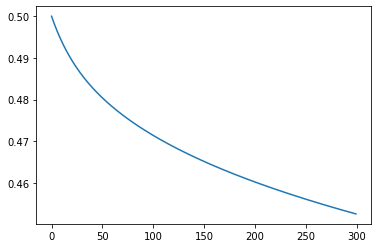

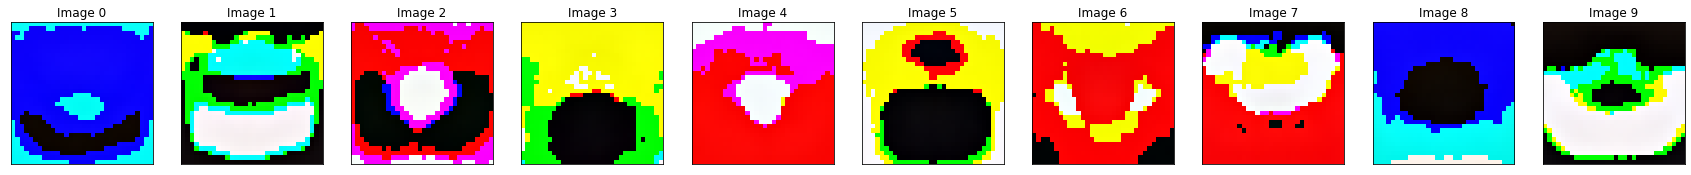

In [24]:
plt.plot(loss_history)

# Showing the weights matrix W as 10 images.
w1 = ((w1/np.max(w1))*255).astype('uint8')
fig, axes  = plt.subplots(1,10, sharex='all', sharey='all', figsize=(30,30))
location = 1
for i in range(K):
    image = w1[1:,i].reshape(32,32,3)
    plt.subplot(1,10,location),plt.imshow(image[:,:,::-1])
    plt.title("Image "+ str(i)),plt.xticks([]),plt.yticks([])
    location+=1
plt.show()

In [6]:
# batch_size = 500 # --> Using all the training examples
# seed = 0
# rng = np.random.default_rng(seed=seed)
# for t in range(iterations):
#     indices = np.arange(batch_size)
#     rng.shuffle(indices)
#     x_train = x_train[indices]
#     y_train = y_train[indices]
#     x_test  =  x_test[indices]
#     y_test  =  y_test[indices]
    
# print(rng)
# indices = np.arange(Ntr)
# rng.shuffle(indices)
# set = indices[0:5]
# print('set :', set)
# print(x_train[set])

# Part 2
Code a two-layer fully connected network with H = 200 hidden nodes. Choose the sigmoid function as the activation function for the hidden nodes. The output layer has no activation function. [3 marks]

1. Implement gradient descent and run for 300 epochs.
2. Report the (initial) learning rate, training and testing loss and accuracies.

# Part 3

Modify the code in item 2 to carry out stochastic gradient descent with a batch size of 500. [2 marks]
1. Report training and testing loss and accuracies.
2. Compare results with item2 (justify).

# Part 4 
Construct a CNN using Keras.models.Sequential (with the following configuration: C32, C64, C64, F64, F10. All three convolutions layers are 3x3. Max pooling (2x2) follows each convolution layer. Use SDG (with momentum) with a batch size of 50 and CategoricalCrossentropy as the loss. [2
marks]
1. How many learnable parameters are there in this network?
2. Report the parameters such as the learning rate and momentum.
3. Report training and testing loss and accuracies.